In [1]:
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta

from model import ShipModel

ports = [(1,1), (30,30),(70,50),(10,70),(70,20), (90,99)]
obstacles = [(10,0),(6,60),(45,24),(20,18),(60,85),(40,15),(60,40),(69,30)]
model = ShipModel(population=50, vision=20, avoidance=1.1, ports=ports, obstacles=obstacles)
len(model.agents)

/home/anita/miniforge3/envs/mesa/lib/python3.13/site-packages/movingpandas/__init__.py:37: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


58

In [2]:
for t in range(300):
    model.step()

In [3]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [4]:
df = agent_df.reset_index()
df[['x', 'y']] = pd.DataFrame(df['pos'].tolist(), index=df.index)
df = df.drop(columns=['pos'])
df

,Step,AgentID,x,y
0,0,1,70.0,20.0
1,0,2,10.0,70.0
2,0,3,1.0,1.0
3,0,4,90.0,99.0
4,0,5,90.0,99.0
...,...,...,...,...
17453,300,54,20.0,18.0
17454,300,55,60.0,85.0
17455,300,56,40.0,15.0
17456,300,57,60.0,40.0


In [5]:
start_datetime = datetime.now()
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))

In [6]:
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)

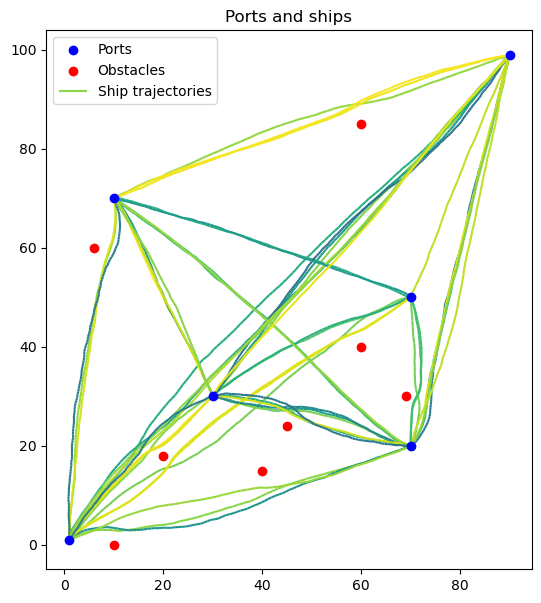

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

x_coords, y_coords = zip(*ports)
ax.scatter(x_coords, y_coords, color='blue', label='Ports', zorder=5)
x_coords, y_coords = zip(*obstacles)
ax.scatter(x_coords, y_coords, color='red', label='Obstacles', zorder=5)
tc.plot(ax=ax, label='Ship trajectories', column='speed')

# Labels and legend
ax.legend()
ax.set_title("Ports and ships")

plt.show()